In [1]:
##Ramniwash Kumar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_csv(r"D:\dataset\train.csv")
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [3]:
df['occupation_type'].unique()

array(['Unknown', 'Laborers', 'Core staff', 'Accountants',
       'High skill tech staff', 'Sales staff', 'Managers', 'Drivers',
       'Medicine staff', 'Cleaning staff', 'HR staff', 'Security staff',
       'Cooking staff', 'Waiters/barmen staff', 'Low-skill Laborers',
       'Private service staff', 'Secretaries', 'Realty agents',
       'IT staff'], dtype=object)

In [4]:
def convert_gender(data):
    if data['gender'] == 'F':
        return 1
    return 0

df['gender'] = df.apply(convert_gender, axis=1)

In [5]:
def own_car_status(data):
    if data['owns_car'] == 'Y':
        return 1
    return 0

df['owns_car'] = df.apply(own_car_status, axis=1)

In [6]:
def own_house_status(data):
    if data['owns_car'] == 'Y':
        return 1
    return 0

df['owns_house'] = df.apply(own_house_status, axis=1)

In [7]:
def check_missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    print(missing)
    missing.sort_values(inplace=True)
    try:
        missing.plot.bar()
    except:
        pass

no_of_children          774
no_of_days_employed     463
total_family_members     83
migrant_worker           87
yearly_debt_payments     95
credit_score              8
dtype: int64


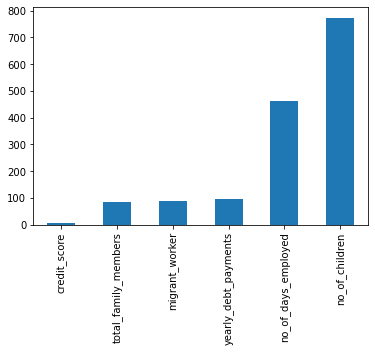

In [8]:
check_missing_values(df)

In [9]:
df = df.fillna(df.mean())

In [10]:
clean_df = df.copy()

In [11]:
df_X = clean_df.drop(["customer_id","credit_card_default", "name"], axis=1)
df_y = df.loc[:, "credit_card_default"]

In [12]:
df_X = pd.get_dummies(df_X,drop_first=False)
df_X.shape

(45528, 34)

In [13]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_X_scaled = scaler.fit_transform(df_X)
print(df_X_scaled)

[[ 0.4375  0.      0.     ...  0.      1.      0.    ]
 [-0.625  -1.      0.     ...  0.      0.      0.    ]
 [-0.125  -1.      0.     ...  0.      0.      0.    ]
 ...
 [-0.75    0.      0.     ...  0.      0.      0.    ]
 [-0.4375 -1.      1.     ...  0.      0.      0.    ]
 [-0.0625 -1.      0.     ...  0.      1.      0.    ]]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_X_scaled, df_y, test_size=0.22, random_state=42)

In [15]:
from sklearn import metrics as skmetrics

def calculate_regression_metrics(y_test, predictions):
    mean_squared_error = skmetrics.mean_squared_error(y_test, predictions)
    mean_absolute_error = skmetrics.mean_absolute_error(y_test, predictions)
    r2_error = skmetrics.r2_score(y_test, predictions)
    result = {'mean_squared_error': mean_squared_error, 'mean_absolute_error': mean_absolute_error, 'r2_score': r2_error}
    return result 

In [16]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9801337725866027


In [17]:
pred = classifier.predict(X_test)
pred = pred.reshape(-1, 1)

calculate_regression_metrics(y_test, pred)

{'mean_squared_error': 0.019866227413397226,
 'mean_absolute_error': 0.019866227413397226,
 'r2_score': 0.7444467919427363}

In [18]:
df_test = pd.read_csv(r"D:\dataset\test.csv")

In [19]:
df_test['gender'] = df_test.apply(convert_gender, axis=1)

In [20]:
df_test['owns_car'] = df_test.apply(own_car_status, axis=1)

In [21]:
df_test['owns_house'] = df_test.apply(own_house_status, axis=1)

In [22]:
df_test.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,1,1,0,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,1,0,0,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,1,0,0,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,1,0,0,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,0,0,0,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


Series([], dtype: int64)


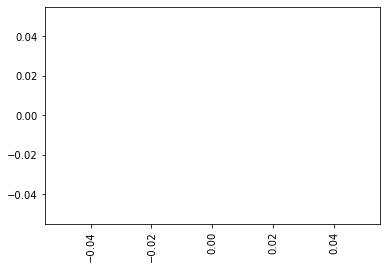

In [23]:
df_test = df_test.fillna(df.mean())
check_missing_values(df_test)

In [24]:
df_test_X = df_test.drop(["customer_id","name"], axis=1)
df_test_X = pd.get_dummies(df_test_X,drop_first=False)

In [25]:
df_test_X.shape

(11383, 34)

In [26]:
df_test_X = scaler.transform(df_test_X)
df_test_X.shape

(11383, 34)

In [27]:
predn = classifier.predict(df_test_X)
submission = pd.DataFrame({
        "customer_id": df_test["customer_id"],
        "credit_card_default": predn
    })

submission.to_csv('submission.csv', index=False)